In [62]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 

In [63]:
disease_data = pd.read_csv('./disease_distribution.csv')
disease_data.head()

,state,cases
0,Haryana,500
1,Punjab,500
2,Delhi,200
3,Uttar Pradesh,100
4,Madhya Pradesh,80


In [64]:
india = gpd.read_file('India-State-and-Country-Shapefile/India_State_Boundary.shp')
india.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


In [65]:
merged = india.set_index('State_Name').join(disease_data.set_index('state'))
# merged_data = india.merge(disease_data, left_on='State_Name', right_on='state', how='left')
merged.head(29)

,geometry,cases
State_Name,,
Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",NaN
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",20.0
Arunachal Pradesh,"POLYGON ((10696175.277 3434232.650, 10696981.8...",5.0
Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2...",5.0
Bihar,"POLYGON ((9362949.333 3188807.607, 9362966.106...",150.0
Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400...",NaN
Chhattishgarh,"POLYGON ((9275926.808 2765881.317, 9276185.437...",NaN
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223...",NaN
Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212...",200.0


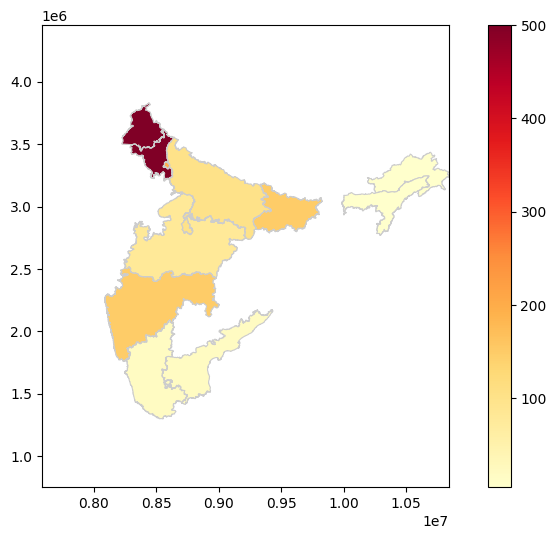

In [66]:
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='cases', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the limits
minx, miny, maxx, maxy = merged.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.show()